In [248]:
import re
import json
import ezodf
import pickle
import requests

import pandas as pd

from bs4 import BeautifulSoup
from tqdm import tqdm

---

In [94]:
ods = ezodf.opendoc("../datasets/Vocab Builder/hindi_vocab.ods")
sheet = ods.sheets[0]
data = [[cell.value for cell in row] for row in sheet.rows()]
df = pd.DataFrame(data)
df

,0,1
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative
...,...,...
9072,RT @aajtak: #Mojo बजरंग बली का सबसे विशालकाय र...,neutral
9073,RT @aajtak: कहां अचानक स्कूल में पड़ा मंत्री क...,neutral
9074,RT @aajtak: #MoJo सुनिए कुलभूषण की दर्दभरी आपब...,neutral
9075,RT @aajtak: लव जेहाद के नाम पर क्या उत्तर प्रद...,neutral


In [95]:
txt = ' '.join(list(df[0]))
words1 = [re.sub(r'[^\u0900-\u097F\u200c\u200d]', '', word) for word in txt.split(' ')]
words1 = [word for word in words1 if word != '']
len(words1)

127126

---

In [96]:
df2 = pd.read_csv('../datasets/ramcharitmanas_df.csv')
df2

,Kand,Verse,Meaning,Verse Type,Verse Count,Page Number
0,बालकाण्ड,वर्णानामर्थसंघानां रसानां छन्दसामपि।\nमड़लानां...,"अक्षरों, अर्थसमूहों, रसों, छन्‍्दों और मंगलोंक...",श्लोक,१,१७
1,बालकाण्ड,भवानीशड्ूरोौ वन्दे श्रद्धाविश्वासरूपिणौ।\nया...,श्रद्धा और विश्वासके स्वरूप श्रीपार्वतीजी और श...,श्लोक,२,१७
2,बालकाण्ड,वन्दे बोधमयं नित्यं गुरु शड्डूररूपिणम्‌।\nयमाथ...,"ज्ञानमय, नित्य, शड्डूररूपी गुरुकी मैं वन्दना क...",श्लोक,३,१७
3,बालकाण्ड,सीतारामगुणग्रामपुण्यारण्यविहारिणौ।\nवन्दे विशु...,श्रीसीतारामजीके गुणसमूहरूपी पवित्र वनमें विहार...,श्लोक,४,१७
4,बालकाण्ड,उद्धवस्थितिसंहारकारिणीं क्लेशहारिणीम्‌।\nसर्वश...,"उत्पत्ति, स्थिति (पालन) और संहार करनेवाली, क्ल...",श्लोक,५,१८
...,...,...,...,...,...,...
6157,उत्तरकाण्ड,मो सम दीन न दीन हित तुम्ह समान रघुबीर।\nअस बिच...,हे श्रीरघुवीर ! मेरे समान कोई दीन नहीं है और आ...,दो०,१३० (क),१०४६
6158,उत्तरकाण्ड,कामिहि नारि पिआरि जिमि लोभिहि प्रिय जिमि दाम।\...,जैसे कामीको स्त्री प्रिय लगती है और लोभीको जैस...,दो०,१३० (ख),१०४६
6159,उत्तरकाण्ड,य त्पूर्व प्रभुणा कृतं सुकविना श्रीशम्भुना दुर...,श्रेष्ठ कवि भगवान्‌ श्रीशंकरजीने पहले जिस दुर्...,श्लोक,१,१०४६
6160,उत्तरकाण्ड,पुण्यं पापहरं सदा शिवकरं विज्ञानभक्तिप्रदं।\nम...,"यह श्रीरामचरितमानस पुण्यरूप, पापोंका हरण करनेव...",श्लोक,२,१०४६


In [97]:
txt = ' '.join(list(df2['Meaning']))
words2 = [re.sub(r'[^\u0900-\u097F\u200c\u200d]', '', word) for word in txt.split(' ')]
words2 = [re.sub(r'[।॥]', '', word) for word in words2]
words2 = [word for word in words2 if word != '']
len(words2)

186801

---

In [74]:
words3 = []

In [251]:
with open('../datasets/Vocab Builder/all_hindi_wikipedia_links.pkl', 'rb') as file:
    urls = pickle.load(file)

In [252]:
len(urls)

230392

In [85]:
len(words3)

3234391

In [82]:
# start_from = 0
start_from = 2200
for i, url in tqdm(enumerate(urls[start_from:])):
    # URL of the Wikipedia page
    # Fetch the content of the page
    response = requests.get(url)
    response.encoding = 'utf-8'  # Ensure proper encoding for Hindi text
    
    # Parse the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    txt = str(soup)
    temp_words = [re.sub(r'[^\u0900-\u097F\u200c\u200d]', '', word) for word in txt.split(' ')]
    temp_words = [re.sub(r'[।॥]', '', word) for word in temp_words]
    temp_words = [word for word in temp_words if word != '']
    words3 += temp_words

2200it [38:07,  1.04s/it]


KeyboardInterrupt: 

In [84]:
words3 = [w for w in words3 if len(w) < 12]

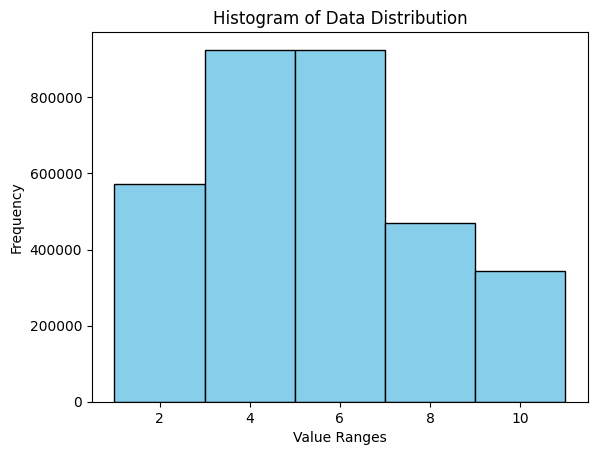

In [86]:
import matplotlib.pyplot as plt

lens = [len(w) for w in words3]
# Plot the histogram
plt.hist(lens, bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.title('Histogram of Data Distribution')

# Show the plot
plt.show()


---

In [169]:
words = words1 + words2 + words3
len(words)

3548318

In [170]:
words = list(set(words))
len(words)

133237

In [171]:
postpositions = [
    'का', 'की', 'के', 'में', 'से', 'पर', 'को', 'तक', 'बिना', 'साथ', 'वाले', 'वाली', 'वाला', 'ने'
]

for idx in range(len(words)):
    word = words[idx]
    for post in postpositions:
        if word.endswith(post) and len(word) > len(post):
            root = word[:-len(post)]
            words[idx] = root
            words.append(post)

words = list(set(words))
len(words)

125468

In [172]:
txt = ' '.join(words)
characters = []
for c in txt:
    characters.append(c)
unique_characters = list(set(characters))
potential_invalid_characters = [char for char in unique_characters if not re.match(r'[ \u0900-\u097F\u200c\u200d]', char) or re.match(r'[।॥]', char)]
print(potential_invalid_characters)

['।', '॥']


In [173]:
print(sorted(unique_characters))

[' ', 'ँ', 'ं', 'ः', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ऍ', 'ऎ', 'ए', 'ऐ', 'ऑ', 'ऒ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'ऩ', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ऱ', 'ल', 'ळ', 'ऴ', 'व', 'श', 'ष', 'स', 'ह', '़', 'ऽ', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'ॄ', 'ॅ', 'ॆ', 'े', 'ै', 'ॉ', 'ॊ', 'ो', 'ौ', '्', 'ॐ', '॑', '॒', '॓', '॔', 'क़', 'ख़', 'ज़', 'ड़', 'ढ़', 'फ़', 'ॠ', '।', '॥', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९', '॰', 'ॱ', 'ॲ', 'ॽ', '\u200c', '\u200d']


In [235]:
valid_words = []
for w in words:
    invalid = False
    for ch in ['०', '१', '२', '३', '४', '५', '६', '७', '८', '९', '॰', 'ॽ', '।', '॥', 'ॱ', 'ॲ', 'ः', 'ऍ', 'ऎ', 'ऑ', 'ॅ', 'ऒ', 'ऱ', 'ॆ', 'ॉ', '॑', '॒', '॓', '॔', 'क़', 'ख़', 'ड़', 'ढ़', 'फ़']:
        if ch in w:
            invalid = True
            break
    if not invalid: valid_words.append(w)

words = list(set(valid_words))
len(words)

117398

In [228]:
txt = ' '.join(words)
characters = []
for c in txt:
    characters.append(c)
unique_characters = list(set(characters))
print(sorted(unique_characters))

[' ', 'ँ', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'ऩ', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'ळ', 'ऴ', 'व', 'श', 'ष', 'स', 'ह', '़', 'ऽ', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'ॄ', 'े', 'ै', 'ॊ', 'ो', 'ौ', '्', 'ॐ', 'ज़', 'ड़', 'ढ़', 'फ़', 'ॠ', '\u200c', '\u200d']


In [242]:
character_mapping = {
    'ः': '',
    'ऩ': 'न',
    'ॄ': 'ृ',
    'ॊ': 'ो',
    'ॠ': 'ऋ',
    'ळ': 'ल',
    'ऴ': 'ल',
    'ँ': 'ं'
}

for i, w in enumerate(words):
    for ch_key, ch_val in character_mapping.items():
        if ch_key in w:
            words[i] = w.replace(ch_key, ch_val)

words = list(set(words))
len(words)

116639

In [243]:
txt = ' '.join(words)
characters = []
for c in txt:
    characters.append(c)
unique_characters = list(set(characters))
print(sorted(unique_characters))

[' ', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', '़', 'ऽ', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'े', 'ै', 'ो', 'ौ', '्', 'ॐ', 'ज़', '\u200c', '\u200d']


---

## Save the vocab json

In [254]:
with open('../datasets/hindi_vocab.json', 'w') as file:
    word_json = json.dumps(words)
    file.write(word_json)

---

## Load the vocab json

In [256]:
with open('../datasets/hindi_vocab.json', 'r') as file:
    word_str = file.read()
    word_json = json.loads(word_str)

In [247]:
[w for w in words if 'ङ' in w]

['प्रसङ्ग',
 'आङ्गलोङ्ग',
 'काङ्ग्',
 'हाङ्ग्',
 'हैओखलढुङ्गा',
 'बैलगाङा',
 'तिङ्सुबन्त',
 'दाशढुङ्गा',
 'लिङ्ग',
 'भाषागुरूङ',
 'अङ्क',
 'पिङ्गलवत्स',
 'ऊंठगाङा',
 'ङ्यो',
 'जिलागरुङ',
 'गौराङ्ग',
 'न्टङ्',
 'ओखलढुङ्गा',
 'तामाङ',
 'राजवंशमिङ',
 'हैखोटाङ',
 'स्रोङ्चन',
 'खोटाङ',
 'छङ्',
 'ओदेम्विङिए',
 'जिलालमजुङ',
 'वेटिङ',
 'राथोङ्ग',
 'चावङी',
 'जिलादाङ',
 'हैबङ्ग',
 'बङा',
 'जनसङ्ख्या',
 'खुङ',
 'शृङ्गारतिलक',
 'मुझुङमुझुङ',
 'सङ्घ',
 'हङकङ',
 'वाङ्मय',
 'गोएङ्',
 'तालजङ्घ',
 'मेकाङ',
 'ङ',
 'जुभिङजुभिङ',
 'सङ्खाकार',
 'अपराइज़िङ्ग',
 'ह्वाङ',
 'काङ्गथिम',
 'हैउरुभङ्ग',
 'जिलाधादिङ',
 'बुङबुङ',
 'जयमङ्गल',
 'मङ्गन',
 'टिङरे',
 'सिण्टेङ्ग',
 'उल्लङ्घनों',
 'गरुङ',
 'हैदाशढुङ्गा',
 'रङ्गबाली',
 'प्याङ',
 'भाषातामाङ',
 'उरुभङ्ग',
 'भङ्ग',
 'हुङुन्ड',
 'श्रेणीगरुङ',
 'बेङ्गलूरु',
 'सङ्ख्या',
 'गुरूङ',
 'अङेल',
 'लिङ्गों',
 'बङ्ग',
 'ङ्युएन',
 'सोताङसोताङ',
 'मंडाङ',
 'ङ्ये',
 'पौलिङ',
 'गङ्गा',
 'काङ्ग्रेस',
 'दिनाङ्क',
 'जुभिङ',
 'अङ्गत्वादि',
 'बङ्गाली',
 'सङ्गठनों',
 'लोङ्गरी',
 '

In [234]:
'खुशि' in words, '' in words

(False, True)